# 포켓몬 데이터 분석하기

### 1-1. Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1-2 Load Dataset

In [3]:
# read_csv 사용
data = pd.read_csv('Pokemon.csv')
pkemon = data

print(pkemon.shape)

pkemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 1-3 데이터 기본 확인 및 전처리하기

In [4]:
# info 확인하기
pkemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


#### 결측치 확인하기

In [6]:
pkemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [12]:
# 결측치가 있는 Type 2 행의 값을 가져와 직접 결측치 확인
pkemon[pkemon['Type 2'].isnull()].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


## 2. EDA #1 : 전설 포켓몬 데이터 셋 분리하기

In [13]:
# 전설포켓몬 분류
legendary = pkemon[pkemon['Legendary'] == True].reset_index(drop = True)

print(legendary.shape)

legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [14]:
print("전설 포켓몬 데이터 비율 : {}%".format(legendary.shape[0]/pkemon.shape[0] * 100))

전설 포켓몬 데이터 비율 : 8.125%


In [16]:
# 일반 포켓몬 분류

ordinary = pkemon[pkemon['Legendary'] == False].reset_index(drop = True)

print(ordinary.shape)

ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 3. EDA#2 : 모든 컬럼 뜯어보기

In [17]:
# pkemon 데이터셋 컬럼 출력하기

print(len(pkemon.columns))
pkemon.columns

# 전체 13개의 column이 존재

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#### (1) 첫 번째 컬럼 '#'

In [21]:
# 같은 #을 갖는 데이터 빈도 수 확인을 통해 알아보기

pkemon['#'].value_counts()

479    6
386    4
711    4
710    4
150    3
6      3
413    3
646    3
303    2
302    2
648    2
65     2
555    2
487    2
308    2
254    2
306    2
310    2
492    2
214    2
384    2
383    2
382    2
647    2
641    2
645    2
94     2
115    2
445    2
257    2
      ..
455    1
454    1
453    1
452    1
451    1
450    1
449    1
447    1
467    1
468    1
469    1
470    1
490    1
489    1
488    1
486    1
485    1
484    1
483    1
482    1
481    1
480    1
478    1
477    1
476    1
474    1
473    1
472    1
471    1
1      1
Name: #, Length: 721, dtype: int64

In [19]:
# 479 확인해보기

pkemon[pkemon['#'] == 479]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
532,479,RotomHeat Rotom,Electric,Fire,520,50,65,107,105,107,86,4,False
533,479,RotomWash Rotom,Electric,Water,520,50,65,107,105,107,86,4,False
534,479,RotomFrost Rotom,Electric,Ice,520,50,65,107,105,107,86,4,False
535,479,RotomFan Rotom,Electric,Flying,520,50,65,107,105,107,86,4,False
536,479,RotomMow Rotom,Electric,Grass,520,50,65,107,105,107,86,4,False


In [20]:
# 386번 확인해보기

pkemon[pkemon['#'] == 386]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


#### (2) 두 번깨 컬럼 : Name

In [22]:
# 총 몇 개의 이름이 있는가?   --> .unique()

len(pkemon['Name'].unique())

800

#### 특정 단어가 들어가있는 이름

In [23]:
# 이름이 비슷한 전설 포켓몬

n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1,n2,n3,n4,n5]).reset_index(drop = True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [24]:
# 이름이 세트로 지어져 있는 포켓몬 set_names
sn1, sn2 = names[:13], names[23:]
set_names = pd.concat([sn1, sn2]).reset_index(drop = True)
set_names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


#### 긴 이름

In [26]:
# legendary에 이름 길이 컬럼

legendary['name_count'] = legendary['Name'].apply(lambda i : len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [27]:
# ordinary에 이름 길이 생성

ordinary['name_count'] = ordinary['Name'].apply(lambda i : len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


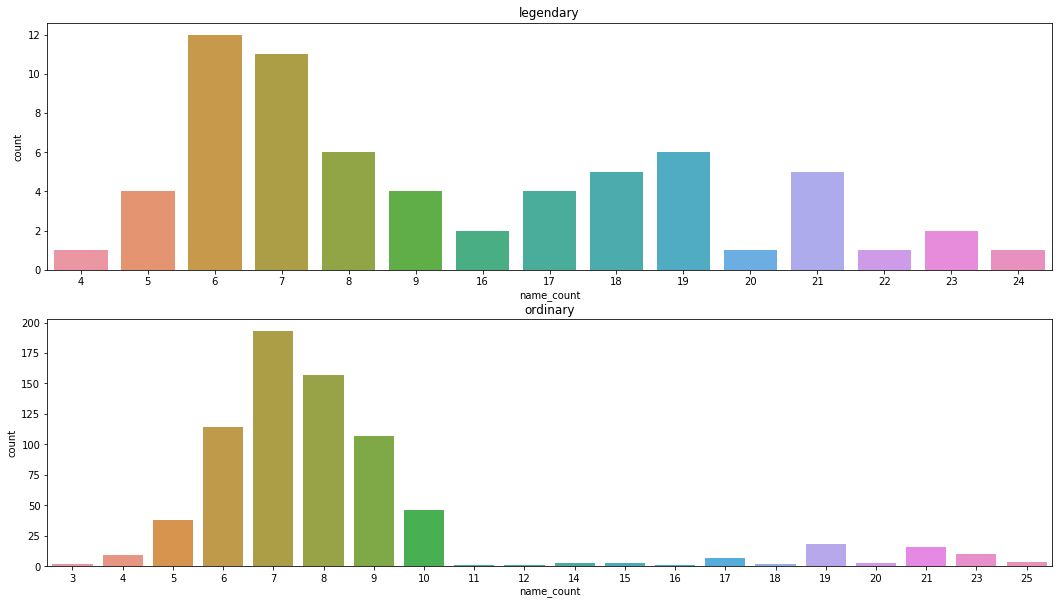

In [32]:
# 이름 길이 시각화

plt.figure(figsize = (18,10))

plt.subplot(211)
sns.countplot(data = legendary, x = "name_count")
plt.title("legendary")

plt.subplot(212)
sns.countplot(data = ordinary, x = "name_count")
plt.title("ordinary")

plt.show()

In [33]:
# legendary name_count가 10 이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [34]:
# ordinary name_count가 10 이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


#### (3) 세, 네번째 컬럼 Type 1, Type 2

In [36]:
pkemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [37]:
# 속성의 종류
len(pkemon['Type 1'].unique()), len(pkemon['Type 2'].unique())

(18, 19)

In [38]:
set(pkemon['Type 2']) - set(pkemon['Type 1'])

{nan}

In [39]:
types = list(pkemon['Type 1'].unique())

In [41]:
len(pkemon[pkemon["Type 2"].isna()])

386

In [42]:
legendary["Type 2"].notnull().sum()

40

#### Type 1 데이터 분포 plot

Text(0.5,1,'Legendary Pokemon')

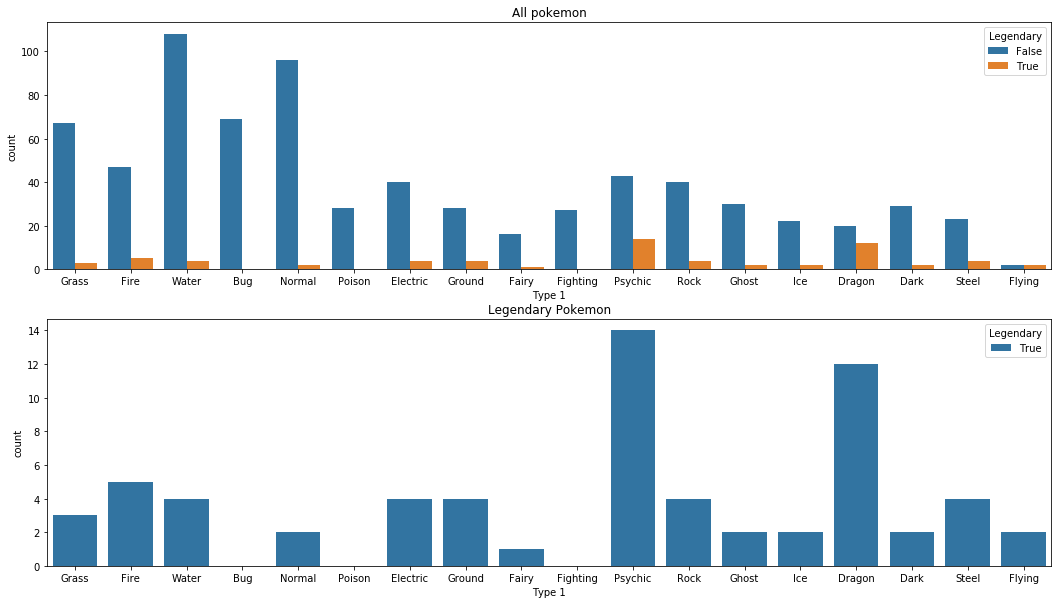

In [44]:
# Type 1 분포 시각화하기
plt.figure(figsize = (18, 10))

plt.subplot(211)
sns.countplot(data = pkemon, x = "Type 1", hue = "Legendary", order = types)
plt.title("All pokemon")

plt.subplot(212)
sns.countplot(data = legendary, x = "Type 1", hue = "Legendary", order = types)
plt.title("Legendary Pokemon")

In [46]:
# 피벗 테이블로 확인
pd.pivot_table(pkemon, index = "Type 1", values = "Legendary").sort_values(by = ["Legendary"], ascending = False).T

Type 1,Flying,Dragon,Psychic,Steel,Ground,Fire,Electric,Rock,Ice,Dark,Ghost,Fairy,Grass,Water,Normal,Poison,Fighting,Bug
Legendary,0.5,0.375,0.245614,0.148148,0.125,0.096154,0.090909,0.090909,0.083333,0.064516,0.0625,0.058824,0.042857,0.035714,0.020408,0.0,0.0,0.0


#### Type 2 데이터 분포 plot

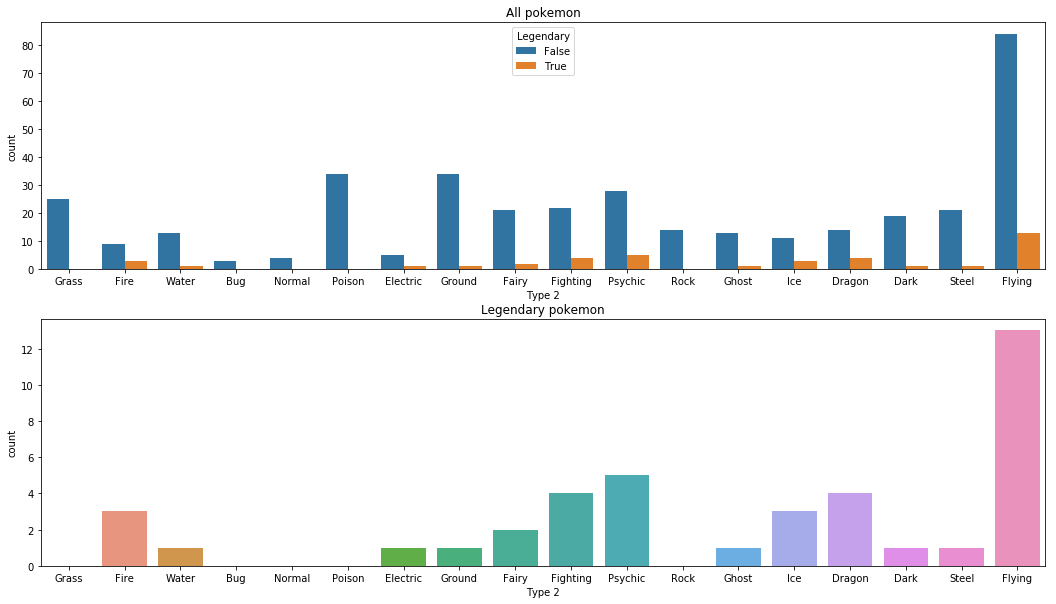

In [47]:
#Type 2 분포 시각화하기
plt.figure(figsize = (18, 10))

plt.subplot(211)
sns.countplot(data = pkemon, x = "Type 2", hue = "Legendary", order = types)
plt.title("All pokemon")

plt.subplot(212)
sns.countplot(data = legendary, x = "Type 2", order = types)
plt.title("Legendary pokemon")

plt.show()

In [48]:
pd.pivot_table(pkemon, index = "Type 2", values = "Legendary").sort_values(by = ["Legendary"], ascending = False).T

Type 2,Fire,Dragon,Ice,Electric,Fighting,Psychic,Flying,Fairy,Water,Ghost,Dark,Steel,Ground,Rock,Bug,Poison,Normal,Grass
Legendary,0.25,0.222222,0.214286,0.166667,0.153846,0.151515,0.134021,0.086957,0.071429,0.071429,0.05,0.045455,0.028571,0.0,0.0,0.0,0.0,0.0


#### (4) Total : stat

In [49]:
# 6가지 전체 스탯을 stats 변수에 저장
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

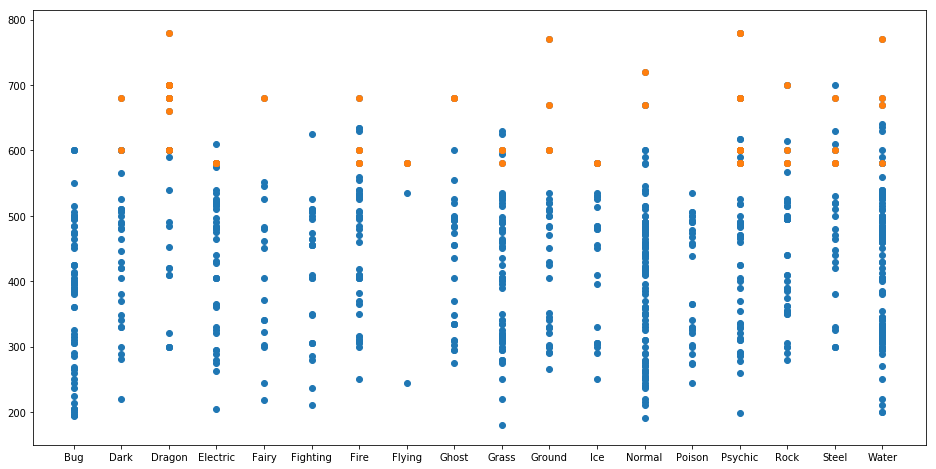

In [51]:
# 분포를 산점도로 표현하여 시각화해보기
plt.figure(figsize=(16,8))

plt.scatter(data = pkemon, x = "Type 1", y = "Total")
plt.scatter(data = legendary, x = "Type 1", y = "Total")
plt.show()

#### 전설 포켓몬들의 속성 total값

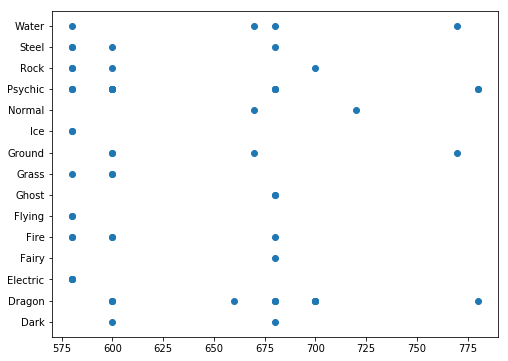

In [52]:
plt.figure(figsize= (8,6))
plt.scatter(data = legendary, y = "Type 1", x = "Total")

plt.show()

In [55]:
# 전설 포켓몬이 가지는 Total 고유값 확인하기

print(legendary['Total'].unique())
len(legendary['Total'].unique())

[580 680 780 600 700 670 770 720 660]


9

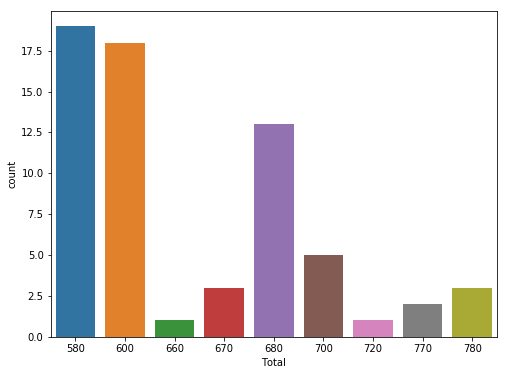

In [57]:
plt.figure(figsize = (8,6))
sns.countplot(data = legendary, x = "Total")
plt.show()

In [58]:
65 / 9
# 약 7.2마리끼리는 같은 total값을 갖는다

7.222222222222222

In [59]:
# 일반 포켓몬이 가지는 total 고유값 확인하기
print(ordinary['Total'].unique())
len(ordinary['Total'].unique())

[318 405 525 625 309 534 634 314 530 630 195 205 395 495 251 349 479 579
 253 413 262 442 288 438 320 485 300 450 275 365 505 273 323 483 299 270
 435 245 455 490 285 305 265 290 440 500 350 555 385 510 310 400 590 390
 335 515 410 315 325 465 352 460 475 600 328 330 480 520 425 340 345 295
 200 540 640 535 355 615 420 215 415 250 218 210 470 280 610 360 180 430
 336 380 700 635 220 240 198 278 518 618 269 414 670 266 456 236 237 474
 190 375 260 575 302 467 560 458 468 308 565 580 194 384 263 363 523 224
 424 244 482 348 498 452 329 411 454 334 494 594 545 528 418 255 370 281
 446 316 292 487 264 358 488 497 313 508 445 294 509 351 519 461 303 401
 567 473 428 464 319 472 489 471 484 550 307 409 423 382 499 213 369 507
 371 552 531 466 448 341 462 306 289 481 362 521 431 304 514]


195

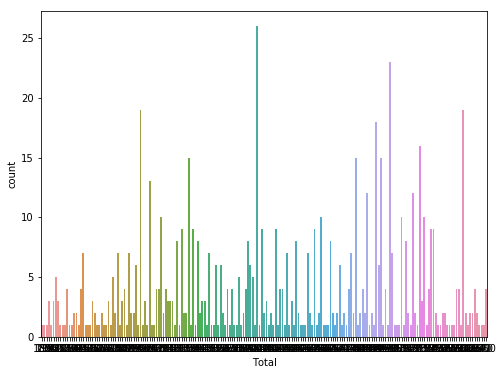

In [60]:
plt.figure(figsize = (8,6))
sns.countplot(data = ordinary, x = "Total")
plt.show()

In [61]:
# 같은 stat값
735/195

3.769230769230769

#### (5) Stats

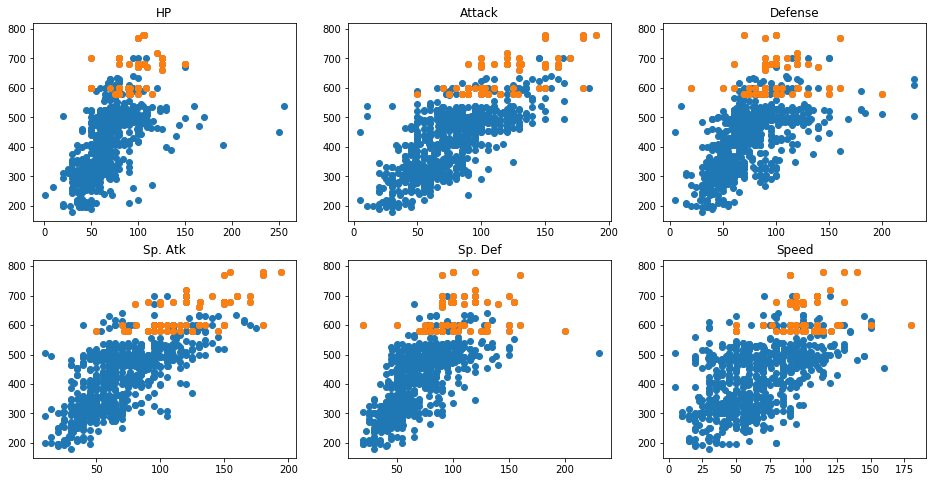

In [63]:
# 6가지 스탯 값 시각화하기 
plt.figure(figsize=(16,8))

plt.subplot(231)
plt.scatter(data=pkemon, y="Total", x="HP")
plt.scatter(data=legendary, y="Total", x="HP")
plt.title('HP')

plt.subplot(232)
plt.scatter(data=pkemon, y="Total", x="Attack")
plt.scatter(data=legendary, y="Total", x="Attack")
plt.title('Attack')

plt.subplot(233)
plt.scatter(data=pkemon, y="Total", x="Defense")
plt.scatter(data=legendary, y="Total", x="Defense")
plt.title('Defense')

plt.subplot(234)
plt.scatter(data=pkemon, y="Total", x="Sp. Atk")
plt.scatter(data=legendary, y="Total", x="Sp. Atk")
plt.title('Sp. Atk')

plt.subplot(235)
plt.scatter(data=pkemon, y="Total", x="Sp. Def")
plt.scatter(data=legendary, y="Total", x="Sp. Def")
plt.title('Sp. Def')

plt.subplot(236)
plt.scatter(data=pkemon, y="Total", x="Speed")
plt.scatter(data=legendary, y="Total", x="Speed")
plt.title('Speed')

plt.show()

#### (6) Generation

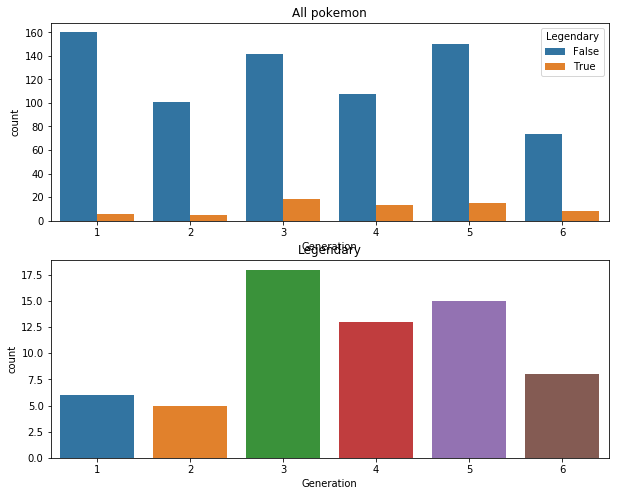

In [65]:
# 세대별 데이터 시각화 
plt.figure(figsize=(10, 8))

plt.subplot(211)
sns.countplot(data = pkemon, x = "Generation", hue = "Legendary")
plt.title("All pokemon")

plt.subplot(212)
sns.countplot(data = legendary, x = "Generation")
plt.title("Legendary")
plt.show()